# Part 2: How are our customers purchasing with us?
Please note that for the dataset for this question, please use the dataset already provided, Recruitment_Transactions_ToBeDistributed.

Behavior of our customers may be different depending on the way that they interact with us. For
example, registered customers (meaning members) generally purchase more than the non registered
customers.

### Import libraries and dataset

***

In [1]:
#Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Import dataset & drop index

df = pd.read_csv('Recruitment_Transactions_ToBeDistributed.csv')
df = df.drop(columns = ["Unnamed: 0"])
df.head(5)

,the_transaction_id,the_date_transaction,sku_idr_sku,product_type,sports,but_name_business_unit,ctm_customer_id,the_to_type,f_qty_item,f_to_tax_in
0,7-1034-1034-20200708214026-101-8628,2020-07-08 21:40:26,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
1,7-1034-1034-20200708164857-211-1734,2020-07-08 16:48:57,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
2,7-1034-1034-20200701155410-102-6163,2020-07-01 15:54:10,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
3,7-1034-1034-20200713202706-102-7516,2020-07-13 20:27:06,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
4,7-1034-1034-20200727160812-211-4800,2020-07-27 16:08:12,0,NaN,NaN,City Square SG,NaN,offline,0,0.0


## Data Wrangling

***

In [3]:
#check data types

print(df.dtypes,df.shape)

the_transaction_id         object
the_date_transaction       object
sku_idr_sku                 int64
product_type               object
sports                     object
but_name_business_unit     object
ctm_customer_id            object
the_to_type                object
f_qty_item                  int64
f_to_tax_in               float64
dtype: object (5496751, 10)


### Data Cleaning - NAs


product_type: NA can be ignored as it does not affect the task

sports: NA can be ignored as it does not affect the task

ctm_customer_id: NA is for Non-Members

In [4]:
df.isna().sum()

#df[df['product_type'].isna()]
#df[df['sports'].isna()]

the_transaction_id              0
the_date_transaction            0
sku_idr_sku                     0
product_type                  878
sports                        656
but_name_business_unit          0
ctm_customer_id           2059281
the_to_type                     0
f_qty_item                      0
f_to_tax_in                     0
dtype: int64

### Data Cleaning - Duplicates

Assumption: It is possible to have duplicated line items for a single transaction, thus we will not remove duplicates

In [5]:
df[df.duplicated()]

,the_transaction_id,the_date_transaction,sku_idr_sku,product_type,sports,but_name_business_unit,ctm_customer_id,the_to_type,f_qty_item,f_to_tax_in
20,7-1034-1034-20200703161240-215-8564,2020-07-03 16:12:40,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
28,7-1034-1034-20200715202634-210-6954,2020-07-15 20:26:34,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
41,7-1034-1034-20200816133421-213-6936,2020-08-16 13:34:21,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
43,7-1034-1034-20200725182904-210-8097,2020-07-25 18:29:04,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
57,7-1034-1034-20200913140525-211-2368,2020-09-13 14:05:25,0,NaN,NaN,City Square SG,340WH3W5ZR,offline,0,0.0
...,...,...,...,...,...,...,...,...,...,...
5496650,7-969-969-20201222104204-211-7857,2020-12-22 10:42:04,7004104,SCALE,RUNNING,Bedok SG,NaN,offline,3,16.5
5496713,7-969-969-20201206122721-209-1438,2020-12-06 12:27:21,2451858,SOCKS,RUNNING,Bedok SG,NaN,offline,2,20.0
5496714,7-969-969-20201206122721-209-1438,2020-12-06 12:27:21,2451858,SOCKS,RUNNING,Bedok SG,NaN,offline,2,20.0
5496733,7-969-969-20201219202733-208-3401,2020-12-19 20:27:33,2338691,SOCKS,RUNNING,Bedok SG,NaN,offline,3,93.0


In [6]:
#proof of duplicated line items for a single transaction

df[df['the_transaction_id']=='7-969-969-20201221181336-210-8719']

,the_transaction_id,the_date_transaction,sku_idr_sku,product_type,sports,but_name_business_unit,ctm_customer_id,the_to_type,f_qty_item,f_to_tax_in
5496734,7-969-969-20201221181336-210-8719,2020-12-21 18:13:36,597350,SOCKS,RUNNING,Bedok SG,NaN,offline,1,92.0
5496735,7-969-969-20201221181336-210-8719,2020-12-21 18:13:36,597350,SOCKS,RUNNING,Bedok SG,NaN,offline,3,92.0
5496736,7-969-969-20201221181336-210-8719,2020-12-21 18:13:36,597350,SOCKS,RUNNING,Bedok SG,NaN,offline,3,92.0
5496737,7-969-969-20201221181336-210-8719,2020-12-21 18:13:36,597350,SOCKS,RUNNING,Bedok SG,NaN,offline,6,92.0
5496738,7-969-969-20201221181336-210-8719,2020-12-21 18:13:36,597350,SOCKS,RUNNING,Bedok SG,NaN,offline,8,92.0


### Data Exploration - Find if there are any mismatch in 'transaction type' & 'business unit'

In [7]:
df.groupby(['the_to_type','but_name_business_unit']).size()

the_to_type  but_name_business_unit   
offline      Bedok SG                      907287
             Centre Point                  617542
             Chinatown Point                42016
             City Square SG                815753
             Decathlon Holland Village      85833
             Decathlon Velocity             98382
             Joo Koon                      857280
             Singapore Lab                1222678
             SunPlaza                       70128
             Tampines Mall                 119129
             Tiong Bahru Plaza              44506
             Waterway Point                 82399
online       Website                       533818
dtype: int64

### Data exploration - To show that 'f_to_tax_in' is independent of quantities of this item sold 

Turnover remains the same for each row despite a change in quantity solid

In [8]:
df[(df['sku_idr_sku']==7323934)]

,the_transaction_id,the_date_transaction,sku_idr_sku,product_type,sports,but_name_business_unit,ctm_customer_id,the_to_type,f_qty_item,f_to_tax_in
667,7-1034-1034-20200711163059-206-2538,2020-07-11 16:30:59,7323934,WATER BAG,RUNNING,City Square SG,NaN,offline,1,191.0
803,7-1034-1034-20200703201006-211-921,2020-07-03 20:10:06,7323934,WATER BAG,RUNNING,City Square SG,DV7E8GS6G2,offline,3,191.0
984,7-1034-1034-20200829191100-211-56,2020-08-29 19:11:00,7323934,WATER BAG,RUNNING,City Square SG,RS5V6LYUL5,offline,2,191.0
1326,7-1034-1034-20200824153827-210-1534,2020-08-24 15:38:27,7323934,WATER BAG,RUNNING,City Square SG,NaN,offline,2,191.0
1351,7-1034-1034-20200816133329-215-3082,2020-08-16 13:33:29,7323934,WATER BAG,RUNNING,City Square SG,NaN,offline,5,191.0
...,...,...,...,...,...,...,...,...,...,...
14641,7-969-969-20201115143239-210-2916,2020-11-15 14:32:39,7323934,WATER BAG,RUNNING,Bedok SG,37MDYNSUF5,offline,6,191.0
14682,7-969-969-20201115192905-208-8796,2020-11-15 19:29:05,7323934,WATER BAG,RUNNING,Bedok SG,NaN,offline,7,191.0
14722,7-969-969-20201128152235-206-2205,2020-11-28 15:22:35,7323934,WATER BAG,RUNNING,Bedok SG,NaN,offline,4,191.0
14907,7-969-969-20201031191158-207-8213,2020-10-31 19:11:58,7323934,WATER BAG,RUNNING,Bedok SG,9HG55CSBQQ,offline,4,191.0


# Task 1

Using R/Python, you are asked to discover other differences in purchasing behaviours by finding out
the following:

###  A. The average basket size and average basket value of members and non-members per store

In [9]:
#Create a new column to indicate if Member or Non-Member
#Non-members have NA for ctm_customer_id

df['member'] = np.where(df['ctm_customer_id'].notna(), "Member", "Non-Member")
df.head(5)

,the_transaction_id,the_date_transaction,sku_idr_sku,product_type,sports,but_name_business_unit,ctm_customer_id,the_to_type,f_qty_item,f_to_tax_in,member
0,7-1034-1034-20200708214026-101-8628,2020-07-08 21:40:26,0,NaN,NaN,City Square SG,NaN,offline,0,0.0,Non-Member
1,7-1034-1034-20200708164857-211-1734,2020-07-08 16:48:57,0,NaN,NaN,City Square SG,NaN,offline,0,0.0,Non-Member
2,7-1034-1034-20200701155410-102-6163,2020-07-01 15:54:10,0,NaN,NaN,City Square SG,NaN,offline,0,0.0,Non-Member
3,7-1034-1034-20200713202706-102-7516,2020-07-13 20:27:06,0,NaN,NaN,City Square SG,NaN,offline,0,0.0,Non-Member
4,7-1034-1034-20200727160812-211-4800,2020-07-27 16:08:12,0,NaN,NaN,City Square SG,NaN,offline,0,0.0,Non-Member


In [10]:
#Since 'f_to_tax_in' is independent of qty, we need to calculate the total turnover by multiplying qty and turnover per item

df['total_turnover'] = df['f_qty_item']*df['f_to_tax_in']

In [11]:
#Average basket size: Find total_qty per transaction > calculate average after splitting by store & member status
#Average basket value: Find total_turnover per transaction > calculate average after splitting by store & member status

df['total_qty'] = df.groupby('the_transaction_id')['f_qty_item'].transform('sum')
df['total_$'] = df.groupby('the_transaction_id')['total_turnover'].transform('sum')

In [12]:
sales_df = df.groupby(['the_to_type','but_name_business_unit','member'])[['total_qty','total_$']].mean().round(2)

### Answer for Task A

In [13]:
sales_df = sales_df.rename(columns={"total_qty": "Avg Basket Size", "total_$": "Avg Basket Value"})
sales_df

Avg Basket Size  \
the_to_type but_name_business_unit    member                        
offline     Bedok SG                  Member                26.68   
                                      Non-Member            22.68   
            Centre Point              Member                24.29   
                                      Non-Member            23.18   
            Chinatown Point           Member                10.27   
                                      Non-Member             7.91   
            City Square SG            Member                21.84   
                                      Non-Member            22.38   
            Decathlon Holland Village Member                12.08   
                                      Non-Member            10.57   
            Decathlon Velocity        Member                11.11   
                                      Non-Member             9.60   
            Joo Koon                  Member                27.73   
                                      Non-Member            21.95   
            Singapore Lab             Member                28.42   
                                      Non-Member            25.37   
            SunPlaza                  Member                11.52   
                                      Non-Member             9.14   
            Tampines Mall             Member                11.51   
                                      Non-Member             9.61   
            Tiong Bahru Plaza         Member                 9.02   
                                      Non-Member             7.65   
            Waterway Point            Member                10.13   
                                      Non-Member             7.93   
online      Website                   Member                22.06   
                                      Non-Member           110.13   

                                                  Avg Basket Value  
the_to_type but_name_business_unit    member                        
offline     Bedok SG                  Member               1600.52  
                                      Non-Member           1317.56  
            Centre Point              Member               1342.75  
                                      Non-Member           1077.88  
            Chinatown Point           Member                583.54  
                                      Non-Member            475.91  
            City Square SG            Member               1272.44  
                                      Non-Member           1213.52  
            Decathlon Holland Village Member                752.63  
                                      Non-Member            649.05  
            Decathlon Velocity        Member                662.37  
                                      Non-Member            561.11  
            Joo Koon                  Member               1599.84  
                                      Non-Member           1260.36  
            Singapore Lab             Member               1614.13  
                                      Non-Member           1518.16  
            SunPlaza                  Member                702.68  
                                      Non-Member            545.56  
            Tampines Mall             Member                668.96  
                                      Non-Member            555.78  
            Tiong Bahru Plaza         Member                508.62  
                                      Non-Member            428.24  
            Waterway Point            Member                604.29  
                                      Non-Member            477.12  
online      Website                   Member               1292.26  
                                      Non-Member           3597.19

### B. There are 3 main channels for customers to shop with us: Experience stores, C&C stores and Online. Find the proportion (in %) of members who shopped at each channel exclusively aswell as the different possible combinations of channels.

Combinations: Exclusive: ES, C&C, Online / Mixed: ES+C&C, ES+Online, C&C+Online / All: ES+C&C+Online (Total 10 groups)

ES (5): City Square SG, Joo Koon, Singapore Lab, Centre Point, Bedok SG	
C&C (7): Decathlon Holland Village, SunPlaza, Chinatown Point, Waterway Point, Tiong Bahru Plaza, Tampines Mall, Decathlon Velocity 

In [14]:
#create list of Experience stores and C&C stores
es_store = ['City Square SG', 'Joo Koon','Singapore Lab', 'Centre Point', 'Bedok SG']
cc_store = ['Decathlon Holland Village', 'SunPlaza', 'Chinatown Point', 'Waterway Point', 'Tiong Bahru Plaza', 'Tampines Mall', 'Decathlon Velocity']

#tag each specfic offline store to the correct channel 
df['channel'] = np.where(df['but_name_business_unit'].isin(es_store), "Experience Store", np.where(df['but_name_business_unit'].isin(cc_store), "C&C Store","Online"))

In [15]:
#Group members by customer_id and append the channels into a list

channel_df = df[df['member']=="Member"].groupby('ctm_customer_id')['channel'].unique().reset_index(drop=False)
channel_df

,ctm_customer_id,channel
0,000DFTLRKY,[Experience Store]
1,000FX6RHTM,[Experience Store]
2,000NZ1KH93,"[Experience Store, C&C Store]"
3,000R842PBV,[Online]
4,0014SWGO7X,[Experience Store]
...,...,...
384892,ZZZMIYQG58,[Experience Store]
384893,ZZZPD2IMD6,[Online]
384894,ZZZS1QUNOD,[Experience Store]
384895,ZZZUB8CDE9,"[C&C Store, Online, Experience Store]"


In [16]:
#sort values in "channel" column so that the values are appended into the list in the same order

channel_df.channel.apply(lambda x: x.sort())

0         None
1         None
2         None
3         None
4         None
          ... 
384892    None
384893    None
384894    None
384895    None
384896    None
Name: channel, Length: 384897, dtype: object

### Answer for Task B

['Experience Store']                         52.52
['Online']                                   17.25
['C&C Store']                                 9.15
['Experience Store' 'Online']                 8.81
['C&C Store' 'Experience Store']              7.02
['C&C Store' 'Experience Store' 'Online']     2.82
['C&C Store' 'Online']                        2.43
Name: channel, dtype: float64


Text(0, 0.5, '')

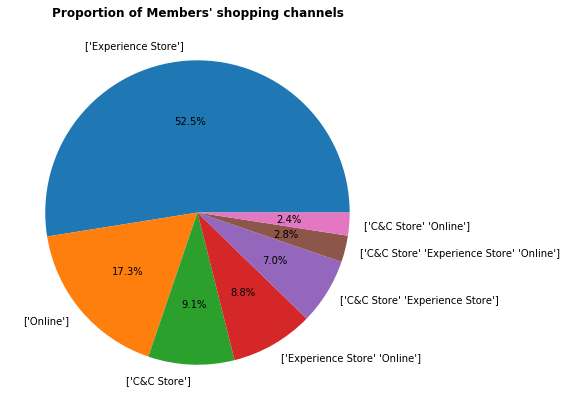

In [17]:
#Proportion of members (in %) who shopped in the different combination of channels
#Count of each unique combination divide by total number of members 

print(round((channel_df.channel.apply(lambda x: str(x)).value_counts()/channel_df.shape[0])*100,2))

pie = (channel_df.channel.apply(lambda x: str(x)).value_counts()/channel_df.shape[0]).plot.pie(figsize=(7,7),autopct='%.1f%%')

plt.title("Proportion of Members' shopping channels", fontweight="bold")
plt.ylabel("")

### C. If there is any timing of the day that is most popular for purchases in stores? Please state the consideration(s) you have made.

Assumption: 
1. We will define "most popular" as the __most number of offline transactions__.
2. Timing will be grouped into hours of the day for easier manipulation and visualization.

Result: 
Most popular time is at __1800 hour (6pm)__.

In [18]:
#Convert "the_date_transaction" to datetime format

df['the_date_transaction'] = pd.to_datetime(df['the_date_transaction'], format='%Y%m%d %H:%M:%S')

In [19]:
#df[df['the_to_type']=='offline'].the_transaction_id.nunique()

### Answer for Task C

the_date_transaction
0        358
1          1
2          1
3          3
4          3
7          3
8       2937
9       6919
10     45153
11     82132
12    103833
13    115962
14    119598
15    125523
16    127402
17    127330
18    129033
19    126776
20    125282
21     98683
22     27824
23      9138
Name: the_transaction_id, dtype: int64


Text(0.5, 0, 'Hour')

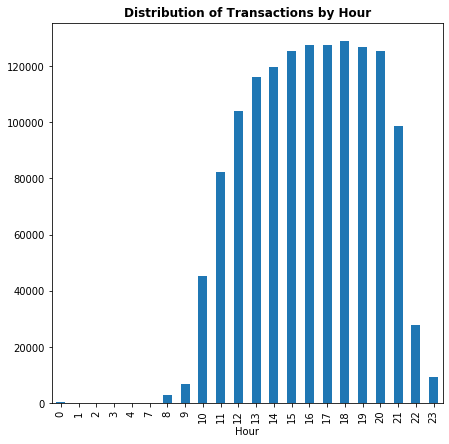

In [20]:
#Graphical respresntation of the results
#Count the number of unique transactions per hour 

print(df[df['the_to_type']=='offline'].groupby(df.the_date_transaction.dt.hour).the_transaction_id.nunique())

df[df['the_to_type']=='offline'].groupby(df.the_date_transaction.dt.hour).the_transaction_id.nunique().plot.bar(figsize=(7,7))

plt.title("Distribution of Transactions by Hour",fontweight="bold")
plt.xlabel("Hour")